In [4]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

import netCDF4 as nc
import os
import xarray as xr
from source2 import *

In [1]:
%load_ext autoreload

fixed_p='/Users/jenifervivar/Desktop/NERTO_2022/Lidar_Data/Vertical_data/'
columns = (np.array([i for i in range(200, 5200, 100)]))
#Montly data frames
dfCnr = pd.DataFrame()
dfBeta = pd.DataFrame()
dfSpectral= pd.DataFrame()
dfWind = pd.DataFrame()
dfatm_pbl = pd.DataFrame()

for folder in sorted(os.listdir(fixed_p))[1:-1]:
    
    date = folder[3:]

    #collects and puts together the data for the whole day
    path = fixed_p + folder + '/'
    variables = VAREXTRACT(path)
    variables.extract()
    #cnr_ = variables.cnr_day
    time = pd.to_datetime(variables.time_day, unit = 's', utc = True)
    #wind = variables.ver_wind_speed 
    #spect_width = variables.spectral_width_day
    #beta = variables.relat_beta_day 
    atm = variables.atm_structures
    #daily dataframes atm_structures 
    #df_cnr =dataframe_set(cnr_, time, date).resample('30T').mean()


    #df_beta = dataframe_set(beta, time, date).resample('30T').mean()

    #df_spectralWidth = dataframe_set(spect_width, time, date).resample('30T').mean()


    #df_wind = dataframe_set(wind, time, date).resample('30T').mean()
    
    df_atm= dataframe_set(atm, time, date)
    
    #df_atm= dataframe_set(atm, time, date).resample('30T').mean()
    #df_atm = df_atm[df_atm ==30]
    
    #.resample('30T').mean()


    #concatanating to all DF
    """
    dfCnr =pd.concat([dfCnr, df_cnr], axis =0)
    dfBeta = pd.concat([dfBeta, df_beta], axis = 0)
    dfSpectral = pd.concat([dfSpectral, df_spectralWidth], axis = 0)
    dfWind = pd.concat([dfWind, df_wind], axis =0)
    """
    dfatm_pbl = pd.concat([dfatm_pbl, df_atm], axis = 0)

print(df_atm.head())    

## Data
loading the entired data from July 15 to October months in 2021. The data is resample by the hour per day and store in a single data frame

In [21]:
from pathlib import Path 
data_p = '/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/'
DF = [dfCnr, dfBeta, dfSpectral, dfWind, dfatm_pbl]
names = ['cnr', 'relative_beta', 'spectral_width', 'vertical_wind', 'atmospheric_structures']
i = 0
for df in DF:
   
    filepath = Path(data_p + names[i]+'.csv')
    print(filepath)
    filepath.parent.mkdir(parents=True, exist_ok=True) 
    df.to_csv(filepath)
    i+=1

/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/cnr.csv
/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/relative_beta.csv
/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/spectral_width.csv
/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/vertical_wind.csv
/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/atmospheric_structures.csv


In [84]:
from pathlib import Path 
data_p = '/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/'
filepath = Path(data_p + 'atmospheric_structures'+'.csv')

filepath.parent.mkdir(parents=True, exist_ok=True) 

dfatm_pbl_ = df_atm_2.to_csv(filepath)

def monthly_df(path):
    """
    
    
    
    
    """
    columns = (np.array([i for i in range(200, 5200, 100)]))
    #Montly data frames
    dfCnr = pd.DataFrame()
    dfBeta = pd.DataFrame()
    dfSpectral= pd.DataFrame()
    dfWind = pd.DataFrame()
    dfatm_pbl = pd.DataFrame()

    for folder in sorted(os.listdir(path))[1:-1]: #[1:-1] means I skipp the dummy file names and last unwated file, it might 
                                                    #need to be change
        date = folder[3:]

        #collects and puts together the data for the whole day
        path = fixed_p + folder + '/'
        variables = VAREXTRACT(path)
        variables.extract()
        cnr_ = variables.cnr_day
        time = pd.to_datetime(variables.time_day, unit = 's', utc = True)
        wind = variables.ver_wind_speed 
        spect_width = variables.spectral_width_day
        beta = variables.relat_beta_day 
        atm = variables.atm_structures
        #daily dataframes atm_structures 
        df_cnr =dataframe_set(cnr_, time, date).resample('30T').mean()


        df_beta = dataframe_set(beta, time, date).resample('30T').mean()

        df_spectralWidth = dataframe_set(spect_width, time, date).resample('30T').mean()


        df_wind = dataframe_set(wind, time, date).resample('30T').mean()

        df_atm= dataframe_set(atm, time, date).resample('30T').mean()


        #concatanating to all DF
        dfCnr =pd.concat([dfCnr, df_cnr], axis =0)
        dfBeta = pd.concat([dfBeta, df_beta], axis = 0)
        dfSpectral = pd.concat([dfSpectral, df_spectralWidth], axis = 0)
        dfWind = pd.concat([dfWind, df_wind], axis =0)
        dfatm_pbl = pd.concat([dfatm_pbl, df_atm], axis = 0)



## All data was saved into CSV files for fast processing

In [5]:
direct_names = ['/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/cnr.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/relative_beta.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/spectral_width.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/vertical_wind.csv',
'/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/atmospheric_structures.csv']

In [6]:
k =0
#DF = [dfCnr, dfBeta, dfSpectral, dfWind, dfatm_pbl]
for direct in direct_names:
    
    if k == 0:    
        dfCnr = pd.read_csv(direct)
        dfCnr.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfCnr['time'] = pd.to_datetime(dfCnr.time)
        dfCnr.set_index('time', inplace = True)
    if k ==1:
        dfBeta = pd.read_csv(direct)
        dfBeta.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfBeta['time'] = pd.to_datetime(dfBeta.time)
        dfBeta.set_index('time', inplace = True)
    if k == 2:
        dfSpectral = pd.read_csv(direct)
        dfSpectral.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfSpectral['time'] = pd.to_datetime(dfSpectral.time)
        dfSpectral.set_index('time', inplace = True)
    if k ==3:
        dfWind = pd.read_csv(direct)
        dfWind.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfWind['time'] = pd.to_datetime(dfWind.time)
        dfWind.set_index('time', inplace = True)
    if k ==4:
        dfatm_pbl = pd.read_csv(direct)
        dfatm_pbl.rename(columns={'Unnamed: 0': 'time'}, inplace = True)
        dfatm_pbl['time'] = pd.to_datetime(dfatm_pbl.time)
        dfatm_pbl.set_index('time', inplace = True)
    k+=1
   

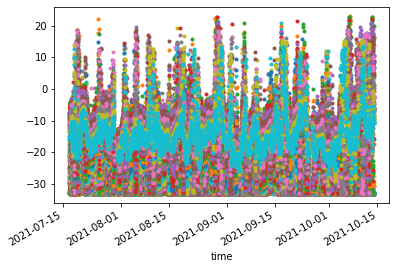

In [7]:
dfCnr.plot(style = '.', legend = False)
plt.show()

<AxesSubplot:>

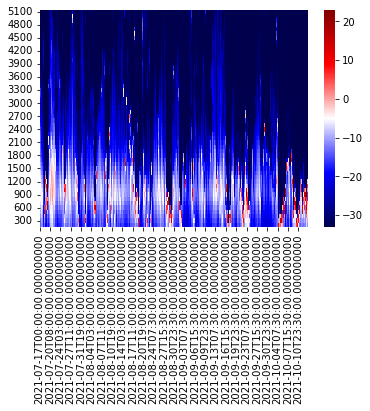

In [6]:
sns.heatmap(dfCnr.T, cmap = 'seismic')

<AxesSubplot:>

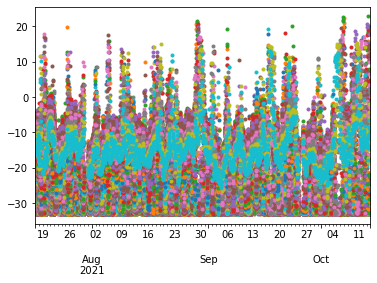

In [7]:
(dfCnr.resample('1H').mean()).plot(style='.', legend =False)

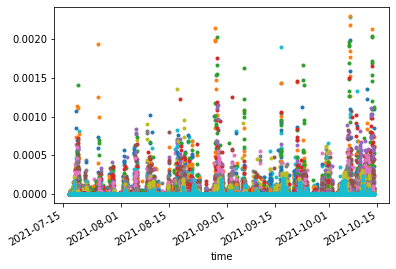

In [8]:
dfBeta.plot(style='.', legend = False)
plt.show()

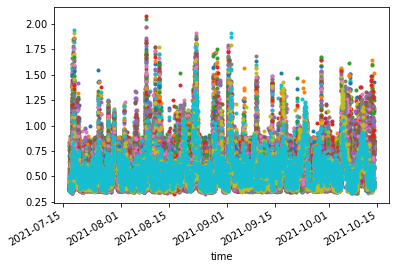

In [9]:
dfSpectral.plot(style = '.', legend = False)
plt.show()

<AxesSubplot:xlabel='time'>

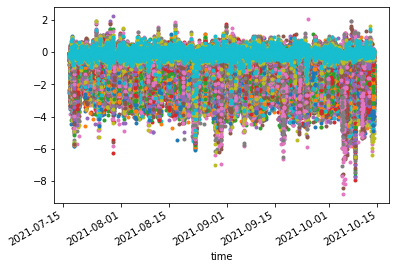

In [10]:
dfWind.plot(style = '.', legend = False)

In [8]:
p = '/Users/jenifervivar/Desktop/NERTO_2022/EXTRA_DATA/wrf_vmixingoutput.csv'
df_wrf =pd.read_csv(p)
df_wrf.drop('Unnamed: 0',axis = 1, inplace = True)
df_wrf['date'] = pd.to_datetime(df_wrf['date'])
df_wrf.set_index('date', inplace = True)
df_wrf.head()

,PSQ,MixHgt,10xKz,U*,Zo,Zterr,Kh,10mWSPD,DSWF,SFCP,RH2m,T02m,Density,Cld,u10m,v10m,WDIR,latitude,longitude,met
date,,,,,,,,,,,,,,,,,,,,
2021-07-17 00:00:00,D,203.60,279.2,0.2194,0.2,13.88,1077.0,1.0640,46.21,1015.0,0.0,303.6,1.152,-100.0,0.7556,0.7492,225.2,40.7,-73.93,AWRF
2021-07-17 01:00:00,D,109.60,123.3,0.1511,0.2,13.88,301.9,0.6020,0.00,1015.0,0.0,302.9,1.154,-100.0,0.5142,0.3131,238.7,40.7,-73.93,AWRF
2021-07-17 02:00:00,D,91.29,115.7,0.1322,0.2,13.88,274.0,0.5782,0.00,1015.0,0.0,302.0,1.157,-100.0,0.2751,0.5086,208.4,40.7,-73.93,AWRF
2021-07-17 03:00:00,D,70.05,127.8,0.1346,0.2,13.89,298.3,0.6292,0.00,1015.0,0.0,301.0,1.161,-100.0,0.1070,0.6201,189.8,40.7,-73.93,AWRF
2021-07-17 04:00:00,D,70.67,111.2,0.1298,0.2,13.88,208.8,0.5446,0.00,1015.0,0.0,300.4,1.163,-100.0,0.3310,0.4325,217.4,40.7,-73.93,AWRF


In [219]:
df_wrf.head(-5)

,PSQ,MixHgt,10xKz,U*,Zo,Zterr,Kh,10mWSPD,DSWF,SFCP,RH2m,T02m,Density,Cld,u10m,v10m,WDIR,latitude,longitude,met
date,,,,,,,,,,,,,,,,,,,,
2021-07-17 00:00:00,D,203.60,279.2,0.2194,0.2,13.88,1077.0,1.0640,46.21,1015.0,0.0,303.6,1.152,-100.0,0.7556,0.7492,225.2,40.7,-73.93,AWRF
2021-07-17 01:00:00,D,109.60,123.3,0.1511,0.2,13.88,301.9,0.6020,0.00,1015.0,0.0,302.9,1.154,-100.0,0.5142,0.3131,238.7,40.7,-73.93,AWRF
2021-07-17 02:00:00,D,91.29,115.7,0.1322,0.2,13.88,274.0,0.5782,0.00,1015.0,0.0,302.0,1.157,-100.0,0.2751,0.5086,208.4,40.7,-73.93,AWRF
2021-07-17 03:00:00,D,70.05,127.8,0.1346,0.2,13.89,298.3,0.6292,0.00,1015.0,0.0,301.0,1.161,-100.0,0.1070,0.6201,189.8,40.7,-73.93,AWRF
2021-07-17 04:00:00,D,70.67,111.2,0.1298,0.2,13.88,208.8,0.5446,0.00,1015.0,0.0,300.4,1.163,-100.0,0.3310,0.4325,217.4,40.7,-73.93,AWRF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 13:00:00,B,342.30,1017.0,0.5362,0.2,13.78,4566.0,3.6350,490.70,1008.0,0.0,297.4,1.172,-100.0,2.5670,-2.5740,315.1,40.7,-73.93,AWRF
2021-07-30 14:00:00,A,692.50,1462.0,0.6596,0.2,13.76,10200.0,4.3940,667.30,1008.0,0.0,298.7,1.167,-100.0,3.1340,-3.0800,314.5,40.7,-73.93,AWRF
2021-07-30 15:00:00,A,903.70,1925.0,0.7706,0.2,13.74,15110.0,5.0430,810.90,1009.0,0.0,299.9,1.163,-100.0,3.7560,-3.3650,311.9,40.7,-73.93,AWRF


<AxesSubplot:xlabel='date'>

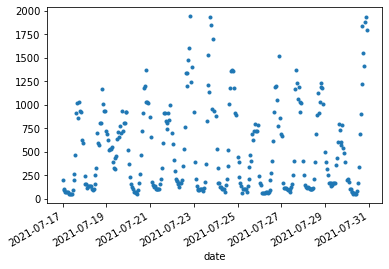

In [18]:
df_wrf.MixHgt.plot(style='.', legend = False)

In [10]:
%autoreload
atm_pbl = pbl_lidar(dfatm_pbl[1:])
atm_pbl

,Lidar_pblh
2021-07-17 11:00:00+00:00,300.0
2021-07-17 12:00:00+00:00,300.0
2021-07-17 13:00:00+00:00,350.0
2021-07-17 14:00:00+00:00,550.0
2021-07-17 15:00:00+00:00,950.0
...,...
2021-10-13 13:00:00+00:00,NaN
2021-10-13 14:00:00+00:00,300.0
2021-10-13 15:00:00+00:00,300.0
2021-10-13 16:00:00+00:00,250.0


In [14]:
atm_pbl_ = atm_pbl.dropna()

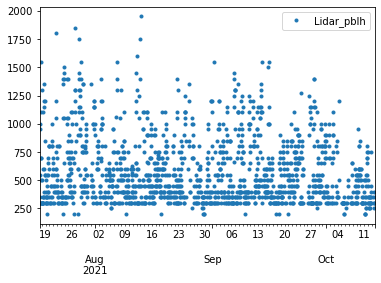

In [16]:
atm_pbl.plot(style='.')
plt.show()

In [32]:
from statistics import mode

df_cop = dfWind.transpose()
df_cop.index = df_cop.index.astype(int)
std_series = (df_cop.resample('H', axis=1).var()).T

rval = []
tval = []
pbl = []
i = 0
for xval in std_series.iterrows():
    
    time = xval[0]
    temp = xval[1]

  
    #the height is adopted at the first height where the var is lower than 0.16 m^2/s^2   
    temp1 = temp[temp < 0.16]
    
    if len(temp1) != 0:
        val = (list(temp1))
        val_=min(val)
        #ind = round(len(val)/2)
        print(val_)
        #val = val[ind]
        print(val)
        maxindex = (temp == val_).argmax()
        print(maxindex)
    pblht = int(temp.index[maxindex])
        # std = temp[maxindex]
    rval.append((time, pblht))
    pbl.append(pblht)
    tval.append(time)
    
    print(pbl)
    i+=1
    if i ==2:
        break
        # stdra.append(std)



8.342013888888809e-05
[0.1561551088927473, 0.041985580246913616, 0.10652958680555555, 0.023852920138888872, 0.0156595837191358, 0.002419953800154325, 0.0034272300347222163, 0.000985803337191359, 0.0017941713927469153, 0.002551162133487658, 0.0028114584297839504, 0.006320314911265427, 0.015844472318672843, 0.03523775038580243, 0.07688645408950617, 0.13553242631172835, 0.15447534722222223, 0.15167043065200614, 0.13666282445987646, 0.1093625510223765, 0.06918683342978395, 0.05077864824459875, 0.03609835223765428, 0.01757552092978395, 0.012973920138888866, 0.011579460744598757, 0.0070277098765432035, 0.0011367176890432025, 0.0031988889853394975, 0.010686407793209857, 0.012704622781635788, 0.009073167534722204, 0.00743522376543208, 0.007063981867283938, 0.005366192226080234, 0.004256312596450609, 0.004501950617283942, 0.002126969135802467, 8.342013888888809e-05, 0.002241709201388893, 0.012075011670524698, 0.0038915802469135785, 0.0034548828125000003, 0.00042940779320987536, 0.00318668055555

In [120]:
time1 = dfCnr.index
len(time1)

4145

In [121]:
time2 = dfWind.index
len(time2)

4145

In [122]:
sc = StandardScaler()
sc.fit(dfCnr)
dfCnr_ = pd.DataFrame(sc.transform(dfCnr), columns = [str(i) for i in np.arange(200, 5200, 100)],
                      index =dfCnr.index)
sc.fit(dfWind)
dfWind_ = pd.DataFrame(sc.transform(dfWind),columns = [str(i) for i in np.arange(200, 5200, 100)],
                      index =dfWind.index)

In [123]:
dfWind_

,200,300,400,500,600,700,800,900,1000,1100,...,4200,4300,4400,4500,4600,4700,4800,4900,5000,5100
time,,,,,,,,,,,,,,,,,,,,,
2021-07-17 00:00:00+00:00,-0.264660,-0.356626,-0.396944,1.404210,-0.539581,1.202683,1.595295,1.720441,1.614067,1.620247,...,0.442136,0.375126,0.347143,0.344214,0.255774,0.134791,0.063251,-0.119149,-0.307467,-0.231470
2021-07-17 00:30:00+00:00,0.350838,-0.672008,-1.476823,0.093768,1.183412,1.818371,2.057961,1.942345,1.795255,1.548389,...,0.530204,0.491819,0.426216,0.328513,0.320965,0.284130,0.156970,0.014220,-0.234034,-0.454410
2021-07-17 01:00:00+00:00,-0.294366,0.278325,-1.021368,0.211640,-0.120640,-0.673382,1.366092,1.607839,1.566032,1.529123,...,0.588933,0.600842,0.584749,0.557318,0.505328,0.441011,0.434392,0.500856,0.427143,0.081259
2021-07-17 01:30:00+00:00,-0.678423,0.200326,0.584976,-1.008516,-0.799204,-0.606277,-1.577449,0.722172,1.465072,0.795643,...,0.461531,0.364827,0.263355,0.127498,0.093993,-0.009637,-0.148471,-0.561463,-1.136845,-0.845177
2021-07-17 02:00:00+00:00,-0.409413,-1.205409,0.107018,0.830013,0.236208,0.434696,-1.964438,-0.248568,1.513846,1.177396,...,0.639098,0.630237,0.587292,0.551071,0.514915,0.446964,0.372425,0.334016,0.181264,0.121984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13 21:30:00+00:00,-0.207954,0.083085,-0.486605,-0.822976,-0.129312,-0.832873,-1.844560,0.223220,-0.332562,-0.088767,...,-3.294846,-1.372747,-0.412758,0.115561,0.310242,0.411634,0.356711,0.302373,0.298130,0.313625
2021-10-13 22:00:00+00:00,-0.024055,-0.172639,0.701257,-0.956276,-0.950437,-0.922438,-1.047206,-0.700295,-0.279142,-1.045985,...,-2.484623,-1.080335,-0.549946,0.079531,0.160266,0.241246,0.224898,0.139041,-0.107283,-0.254671
2021-10-13 22:30:00+00:00,0.334057,-0.293411,-0.650616,-0.039460,0.808160,-0.421913,0.154033,-0.201001,-0.155085,-1.514971,...,-0.249665,-0.090823,0.287787,0.212489,0.384249,0.434417,0.397079,0.361849,0.349882,0.257036


In [200]:
%autoreload
cnr_pbl_mean = pbl_height(dfCnr, stat = 'mean',var_type = 'CNR')
cnr_pbl_med = pbl_height(dfCnr, stat = 'median',var_type = 'CNR')
cnr_pbl_var = pbl_height(dfCnr, stat = 'var',var_type = 'CNR')
cnr_pbl_std =pbl_height(dfCnr,var_type = 'CNR')
wind_var = pbl_height(dfWind, stat = 'var', var_type= 'wind', avetime="30T")

In [201]:
df_mean = pd.DataFrame({'cnr_mean':cnr_pbl_mean[1]}, index = cnr_pbl_mean[0])
df_med =  pd.DataFrame({'cnr_med':cnr_pbl_med[1]}, index = cnr_pbl_med[0])
df_std = pd.DataFrame({'cnr_std':cnr_pbl_std[1]}, index = cnr_pbl_std[0])
df_var = pd.DataFrame({'cnr_var':cnr_pbl_var[1]}, index = cnr_pbl_var[0])
wind_var_df = pd.DataFrame({'wind_var':wind_var[1]}, index = wind_var[0])

In [202]:
df_pbl_all= pd.DataFrame()
dfs = [df_med,df_mean, df_var, wind_var_df, atm_pbl_]
for df in dfs:
    df_pbl_all = pd.concat([df_pbl_all,df], axis = 1)
    
df_pbl_all.head(-5)


,cnr_med,cnr_mean,cnr_var,wind_var,Lidar_pblh
2021-07-17 00:00:00+00:00,1100,1100,3200,1000.0,NaN
2021-07-17 01:00:00+00:00,1100,1100,3200,1100.0,NaN
2021-07-17 02:00:00+00:00,1000,1000,2200,1000.0,NaN
2021-07-17 03:00:00+00:00,900,900,2700,850.0,NaN
2021-07-17 04:00:00+00:00,900,900,2700,1100.0,NaN


In [206]:
df_pbl_all.head(-5)

,cnr_med,cnr_mean,cnr_var,wind_var,Lidar_pblh
2021-07-17 00:00:00+00:00,1100,1100,3200,1000.0,NaN
2021-07-17 01:00:00+00:00,1100,1100,3200,1100.0,NaN
2021-07-17 02:00:00+00:00,1000,1000,2200,1000.0,NaN
2021-07-17 03:00:00+00:00,900,900,2700,850.0,NaN
2021-07-17 04:00:00+00:00,900,900,2700,1100.0,NaN
...,...,...,...,...,...
2021-10-13 14:00:00+00:00,800,800,1000,650.0,300.0
2021-10-13 15:00:00+00:00,600,600,800,1100.0,300.0
2021-10-13 16:00:00+00:00,600,600,700,900.0,250.0
2021-10-13 17:00:00+00:00,700,700,800,1000.0,350.0


In [213]:
%autoreload
d = pd.read_excel('/Users/jenifervivar/Desktop/NERTO_2022/EXTRA_DATA/nyc_prec_july2021_August_2021.xlsx')
d.head()

,Date,Maximun,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-07-01,84,72,78.0,1.7,0,13,0.9,0,0
1,2021-07-02,79,62,70.5,-5.9,0,6,0.67,0,0
2,2021-07-03,66,59,62.5,-14.1,2,0,0.34,0,0
3,2021-07-04,79,60,69.5,-7.3,0,5,0,0,0
4,2021-07-05,83,67,75.0,-1.9,0,10,0,0,0


In [229]:
d['Precipitation'] = d['Precipitation'].apply(lambda x: 0 if x == 'T' else x)
d['Precipitation']

0      0.90
1      0.67
2      0.34
3      0.00
4      0.00
       ... 
118    0.16
119    0.00
120    0.41
121    0.57
122    0.04
Name: Precipitation, Length: 123, dtype: float64

In [230]:
d['Precipitation'].astype(int)
d

,Date,Maximun,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-07-01,84,72,78.0,1.7,0,13,0.90,0,0
1,2021-07-02,79,62,70.5,-5.9,0,6,0.67,0,0
2,2021-07-03,66,59,62.5,-14.1,2,0,0.34,0,0
3,2021-07-04,79,60,69.5,-7.3,0,5,0.00,0,0
4,2021-07-05,83,67,75.0,-1.9,0,10,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
118,2021-10-27,61,53,57.0,2.9,8,0,0.16,0,0
119,2021-10-28,57,49,53.0,-0.8,12,0,0.00,0,0
120,2021-10-29,56,47,51.5,-2.0,13,0,0.41,0,0
121,2021-10-30,64,53,58.5,5.3,6,0,0.57,0,0


In [231]:
d.dtypes

Date             datetime64[ns]
 Maximun                  int64
Minimum                   int64
Average                 float64
Departure               float64
HDD                       int64
CDD                       int64
Precipitation           float64
New Snow                  int64
Snow Depth                int64
dtype: object

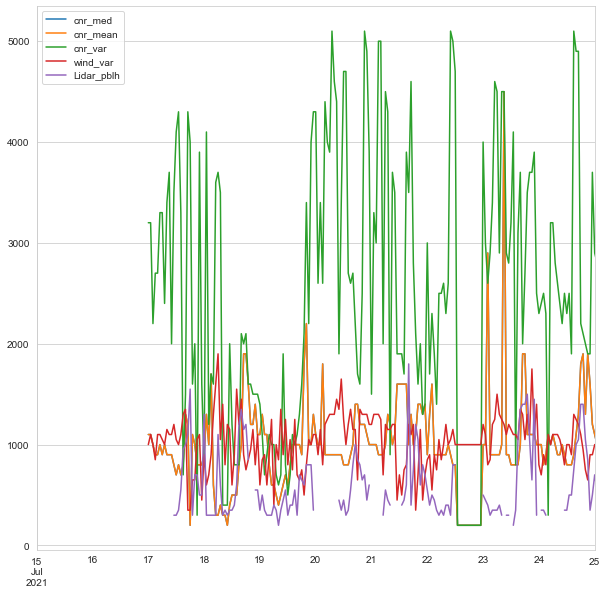

In [237]:
import datetime
sns.set_style('whitegrid')

#fig, ax =plt.subplots(figsize = (10,10))
#plt.plot()
#plt.plot(df_mean, label = "mean")
df_pbl_all.plot(style='-', figsize = (10,10))
ax = plt.gca()
#fig.autofmt_xdate()
d1 = datetime.datetime(2021,7,15,0)
d2 = d1 + datetime.timedelta(days = 10)
#print(d1,d2)
ax.set_xlim(d1,d2)


#plt.plot(df_mean, label = "mean")
#plt.plot(wind_var_df, label = "median")
#plt.plot(df_std, label = "wind_var", alpha = 0.8)
#plt.plot(atm_pbl_, label = 'pblh_calculation', style='.')
#plt.plot(df_mh, label="wrf_mxh", alpha = 0.6)

#d1 = datetime.datetime(2021,7,15)
#d2 = datetime.datetime(2021,8,1)
#plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


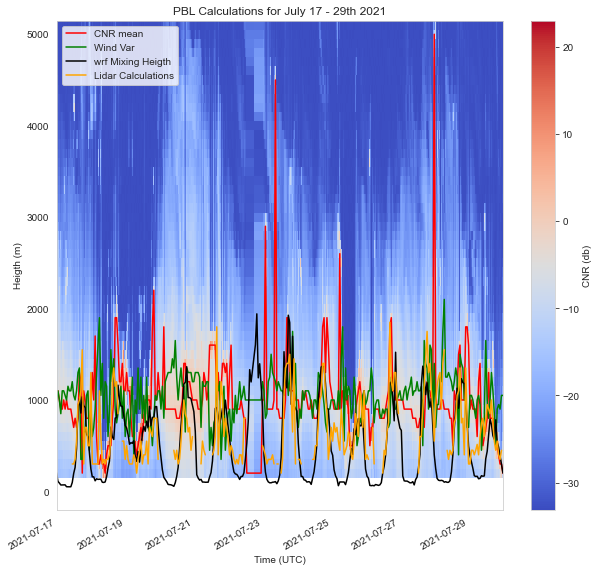

In [243]:
%autoreload
plot_all(dfCnr, plot_type='pcolormesh',cmap='coolwarm', cbarlbl="CNR (db)", date = "July 17 - 29th 2021")

ax = plt.gca()
ax.plot(df_med, label = "CNR mean", color = 'red')
#ax.plot(df_var, label = "cnr variance", color = 'yellow')
#ax.plot(df_std, label ="CNR std", color = 'orange')
ax.plot(wind_var_df, label='Wind Var', color = 'green')
ax.plot(df_wrf['MixHgt'], label='wrf Mixing Heigth', color ='black')
ax.plot(atm_pbl, label='Lidar Calculations', color = 'orange')
plt.legend()
d1 = datetime.datetime(2021,7,17,0)
d2 = d1 + datetime.timedelta(days = 13)
#print(d1,d2)
ax.set_xlim(d1,d2)
#plt.savefig('allCalculations_comparison_wrf_data')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


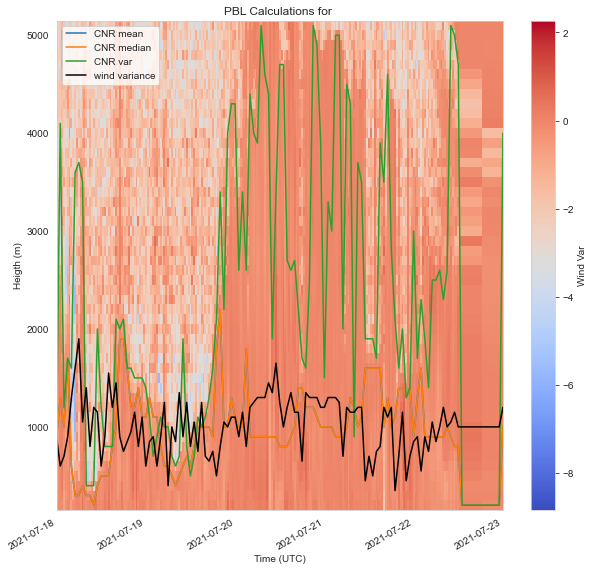

"\nplot_all(dfCnr, plot_type='pcolormesh')\nax = plt.gca()\nd1 = datetime.datetime(2021,7,17,0)\nd2 = d1 + datetime.timedelta(days = 5)\n#print(d1,d2)\nax.set_xlim(d1,d2)\n\nplt.legend()\nplt.show()\n"

In [218]:
plot_all(dfWind, plot_type='pcolormesh', cmap='coolwarm', cbarlbl="Wind sp")
#.resample('H').var())
ax = plt.gca()
#ax.plot(atm_pbl, label = "PBLH Lidar")
ax.plot(df_mean, label = "CNR mean")
ax.plot(df_med, label ='CNR median')
ax.plot(df_var, label = "CNR var")
ax.plot(wind_var_df, color = 'black', label="wind variance")
#ax.plot(wind_var_df.rolling(window =20).mean(), label="moving average")
#df['brandA'].rolling(window =20).mean().plot()

d1 = datetime.datetime(2021,7,18,0)
d2 = d1 + datetime.timedelta(days = 5)
#print(d1,d2)
ax.set_xlim(d1,d2)

plt.legend()
plt.show()

"""
plot_all(dfCnr, plot_type='pcolormesh')
ax = plt.gca()
d1 = datetime.datetime(2021,7,17,0)
d2 = d1 + datetime.timedelta(days = 5)
#print(d1,d2)
ax.set_xlim(d1,d2)

plt.legend()
plt.show()
"""


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


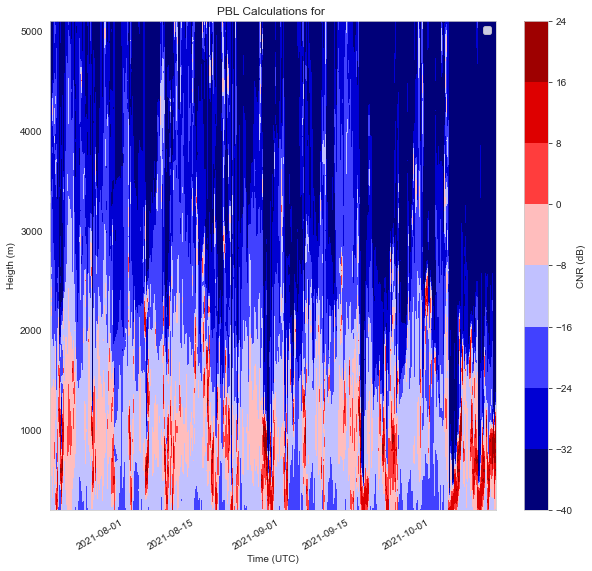

In [37]:
plot_all(dfCnr)

## Feature reduction
I would like to only get the most relevant features of each data frame. Each data frame is specific to wind, cnr, etc. The goal is to have all these important values combined in a data frame

In [29]:
def reducer(df, n_features = 2):
    scaler = StandardScaler()
    std_df = scaler.fit_transform(df)
    pca = PCA(n_features)
    x = pca.fit_transform(std_df)
    var= pca.explained_variance_ratio_
    return x, var

In [30]:
cnr,v = reducer(dfCnr)
wind, v_1 = reducer(dfWind)
beta, v_2 = reducer(dfBeta)
espWidth, v_3 = reducer(dfSpectral)

In [31]:
print(v, v_1, v_2, v_3)

[0.43187139 0.14496053] [0.42430761 0.132484  ] [0.07432275 0.06183959] [0.52900852 0.18747235]


In [ ]:
all_df.head(-5)

In [ ]:
all_x = 

In [ ]:
std_cnr = scaler.fit_transform(dfCnr)

pca = PCA(3)
cnr_ = pca.fit_transform(std_cnr)

In [ ]:
pca.singular_values_

In [ ]:
#standarizing the data and reducing the amount of inputs I need
scaler = StandardScaler()
std_df = scaler.fit_transform(dfWind)
print(std_df)
pca = PCA(3)
w = pca.fit_transform(std_df)
print(x, type(x))

In [ ]:
#verifying % of data explained by variables
pca.components_

In [ ]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [ ]:
#plotting the sum of squares distances to get ideal k value
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
range(2, 11), sse, curve="convex", direction="decreasing")

kl.elbow

In [ ]:
kmeans = KMeans(5)
identified_custers = kmeans.fit_predict(x)
identified_custers

In [ ]:
x[:,0]

In [ ]:
plt.scatter(x[:,0],x[:,1],c=identified_custers,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = '*', c  = 'black')
plt.show()

## Kmeans pipeline

In [ ]:
preprocessor = Pipeline([("scaler",  StandardScaler()), ("pca", PCA(n_components=2, random_state=42)),])

In [ ]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=10,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [ ]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])